In [149]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [150]:
import pandas as pd 
df = pd.read_csv('/content/sample_data/exam_score - exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,group D,some college,standard,completed,59,70,78
1,1,group D,associate's degree,standard,none,96,93,87
2,2,group D,some college,free/reduced,none,57,76,77
3,1,group B,some college,free/reduced,none,70,70,63
4,2,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,1,group C,some college,standard,none,77,77,71
996,1,group C,some college,standard,none,80,66,66
997,2,group A,high school,standard,completed,67,86,86
998,1,group E,high school,standard,none,80,72,62


In [151]:
# df['gender'] =df['gender'].astype('category') 
# df['gender'] = df['gender'].cat.codes

In [152]:
sex = df.pop('gender')
df['M'] = (sex == 1)*1
df['F'] = (sex == 2)*1

In [153]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,M,F
0,group D,some college,standard,completed,59,70,78,0,1
1,group D,associate's degree,standard,none,96,93,87,1,0
2,group D,some college,free/reduced,none,57,76,77,0,1
3,group B,some college,free/reduced,none,70,70,63,1,0
4,group D,associate's degree,standard,none,83,85,86,0,1
...,...,...,...,...,...,...,...,...,...
995,group C,some college,standard,none,77,77,71,1,0
996,group C,some college,standard,none,80,66,66,1,0
997,group A,high school,standard,completed,67,86,86,0,1
998,group E,high school,standard,none,80,72,62,1,0


In [154]:
df.isnull().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
M                              0
F                              0
dtype: int64

In [155]:
df = df.drop(columns=['race/ethnicity','parental level of education','lunch','test preparation course'])

In [156]:
df

,math score,reading score,writing score,M,F
0,59,70,78,0,1
1,96,93,87,1,0
2,57,76,77,0,1
3,70,70,63,1,0
4,83,85,86,0,1
...,...,...,...,...,...
995,77,77,71,1,0
996,80,66,66,1,0
997,67,86,86,0,1
998,80,72,62,1,0


In [157]:
X = df.drop(columns='math score')

In [158]:
X

,reading score,writing score,M,F
0,70,78,0,1
1,93,87,1,0
2,76,77,0,1
3,70,63,1,0
4,85,86,0,1
...,...,...,...,...
995,77,71,1,0
996,66,66,1,0
997,86,86,0,1
998,72,62,1,0


In [159]:
y = df['math score']

In [160]:
y

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [163]:
X_train.head()

,reading score,writing score,M,F
687,60,59,1,0
500,97,91,0,1
332,63,63,1,0
979,84,78,1,0
817,69,63,0,1


In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [165]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(X_train),
      columns=X_train.columns
  )

X_test_scaled = pd.DataFrame(
      standard_scaler.transform(X_test),
      columns = X_test.columns
  )

In [206]:


model = Sequential([
    # Dense(160, kernel_initializer='normal', activation='relu'),
    # # Dropout(0.2),
    # Dense(480, kernel_initializer='normal', activation='relu'),
    # # Dropout(0.2),
    # Dense(256, kernel_initializer='normal', activation='relu'),
    # Dense(8, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [207]:
model.compile(
    loss='msle', 
    optimizer='adam', 
    metrics=['msle']
)

In [208]:
history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=200, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/200
10/10 [==============================] - 0s 17ms/step - loss: 17.5079 - msle: 17.5079 - val_loss: 17.6555 - val_msle: 17.6555
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 17.3925 - msle: 17.3925 - val_loss: 17.5331 - val_msle: 17.5331
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 17.2788 - msle: 17.2788 - val_loss: 17.4166 - val_msle: 17.4166
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 17.1704 - msle: 17.1704 - val_loss: 17.3048 - val_msle: 17.3048
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 17.0676 - msle: 17.0676 - val_loss: 17.1970 - val_msle: 17.1970
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 16.9681 - msle: 16.9681 - val_loss: 17.0942 - val_msle: 17.0942
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 16.8733 - msle: 16.8733 - val_loss: 16.9978 - val_msle: 16.9978
Epoch 8/200
10/10 [=====================

In [209]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

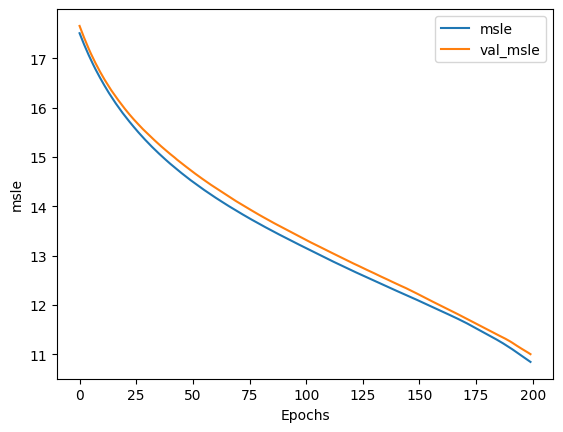

In [210]:
# Plot the history
plot_history(history, 'msle')

In [211]:
X_test['prediction'] = model.predict(X_test_scaled)

7/7 [==============================] - 0s 1ms/step


In [226]:
score, acc = model.evaluate(X_test_scaled, y_test)

print('test score : ', score)
print('test accuracy : ', acc)

7/7 [==============================] - 0s 4ms/step - loss: 10.8113 - msle: 10.8113
test score :  10.811293601989746
test accuracy :  10.811293601989746


In [224]:
import numpy as np
test_data = np.array([47,	45,	1,	0])
print(model.predict(test_data.reshape(1,4), batch_size=1))

1/1 [==============================] - 0s 19ms/step
[[48.57523]]


In [217]:
df

,math score,reading score,writing score,M,F
0,59,70,78,0,1
1,96,93,87,1,0
2,57,76,77,0,1
3,70,70,63,1,0
4,83,85,86,0,1
...,...,...,...,...,...
995,77,77,71,1,0
996,80,66,66,1,0
997,67,86,86,0,1
998,80,72,62,1,0
